In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [28]:
df1 = df[['budget', 'revenue']]
df1

,budget,revenue
0,237000000,2787965087
1,300000000,961000000
2,245000000,880674609
3,250000000,1084939099
4,260000000,284139100
...,...,...
4798,220000,2040920
4799,9000,0
4800,0,0
4801,0,0


In [29]:
df1.isna().sum()

budget     0
revenue    0
dtype: int64

In [30]:
df1 = df1.dropna()
df1.isna().sum()

budget     0
revenue    0
dtype: int64

C:\Users\nisch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


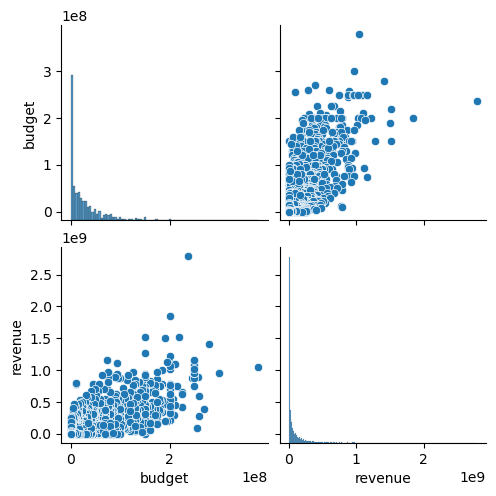

In [31]:
sns.pairplot(df1)

In [ ]:
# data = df1['production_companies'][0]
# data
# df2 = pd.read_json(data)
# company_df = pd.DataFrame({'company':[list(df2['name'])]})
# company_df

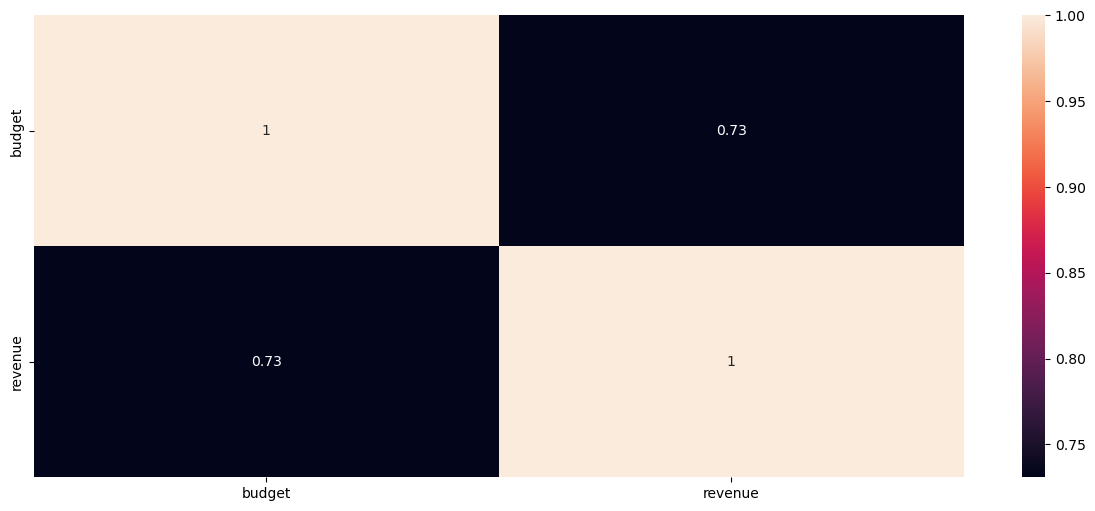

In [32]:
plt.figure(figsize = (15, 6))
sns.heatmap(df1.corr(), annot = True)
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
df2_train, df2_test = train_test_split(df1, test_size = 0.1, random_state = 1)
# df2_train.shape

(4322, 2)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df2_train[['budget']].values
Y = df2_train[['revenue']].values
lin = LinearRegression()

lin.fit(X, Y)



LinearRegression()

LinearRegression()

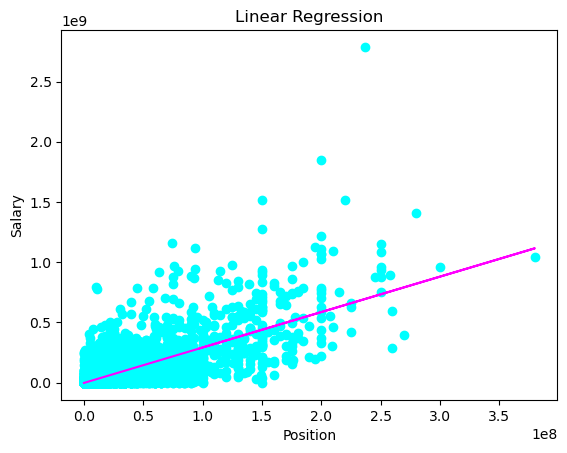

In [42]:
# Visualizing the Polymonial Regression results

plt.scatter(X,Y,color="cyan")
plt.plot(X,lin.predict(X),color="magenta")
plt.title("Linear Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()


In [56]:
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

LinearRegression()

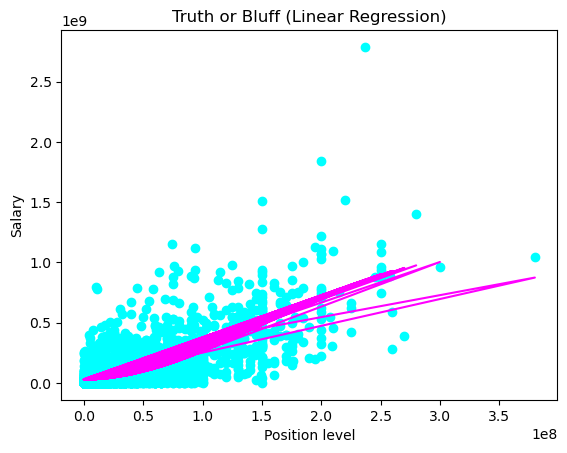

In [53]:
# Visualizing the Polymonial Regression results

plt.scatter(X, Y, color='cyan')
plt.plot(X, pol_reg.predict(X_poly), color='magenta')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [58]:
data = df2_test.iloc[53:54]

actual_rev = data.pop('revenue')

print(f'actual rev = {actual_rev}')
data


actual rev = 870    190458706
Name: revenue, dtype: int64


,budget
870,54000000


In [59]:
pol_reg.predict(poly_reg.fit_transform([[54000000]]))
# import numpy as np
# predicted_all = model.predict(data)
# np.set_printoptions(suppress=True)
# print(predicted_all[0])
# # print('actual sa =', actual_salary)
# # print('Predicted salary =', predicted_salary)

array([[67824914.26172]])

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)

C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

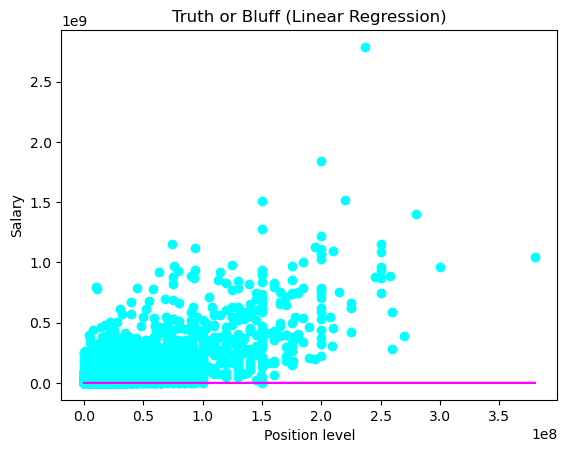

In [62]:
plt.scatter(X, Y, color='cyan')
plt.plot(X, lr.predict(X), color='magenta')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [64]:
exp = float(input("Enter budget = "))
exp = np.array([[exp]])
print(exp)
predicted_rev = lr.predict(exp)[0]
print(predicted_rev)

Enter budget = 54000000
[[54000000.]]
0
